In [41]:
#Chargeons les données à l'aide de la bibliothèque pandas
import pandas as pd
                                                        
df= pd.read_csv(r"C:\Users\TOSHIBA\Dak_gomycode\kc_house_data.csv",parse_dates=['date'])
df.head() # affichons les 5 premières lignes de nos données

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Prétraitement des données

In [38]:
#Affichons les informations de base sur les données en utilisant la méthode info().
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [29]:
#Vérifier les types de données de chaque colonne:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [67]:
# Convertissons la colonne "date" en objet datetime
df['date'] = pd.to_datetime(df['date'])

# Ajoutons des colonnes d'informations de temps
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

# Supprimons la colonne "date" d'origine si nécessaire
df = df.drop('date', axis=1)

In [16]:
#Examinons la forme de l'ensemble de données
df.shape

(21613, 21)

In [30]:
#Vérifions s'il y a des valeurs manquantes dans le jeu de données:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [42]:
#Vérifions les statistiques pour colonnes numériques (la moyenne, l'écart type, le minimum, le maximum et les quartiles)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [43]:
#Vérifions s'il y a des doublons dans les données:
df.duplicated().sum()

0

In [44]:
#Supprimons les colonnes inutiles comme l'ID de la maison
df = df.drop('id', axis=1)

In [45]:
#Encodons les variables catégorielles en variables numériques comme le code postal
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['zipcode'] = le.fit_transform(df['zipcode'])

## Visualisation des données

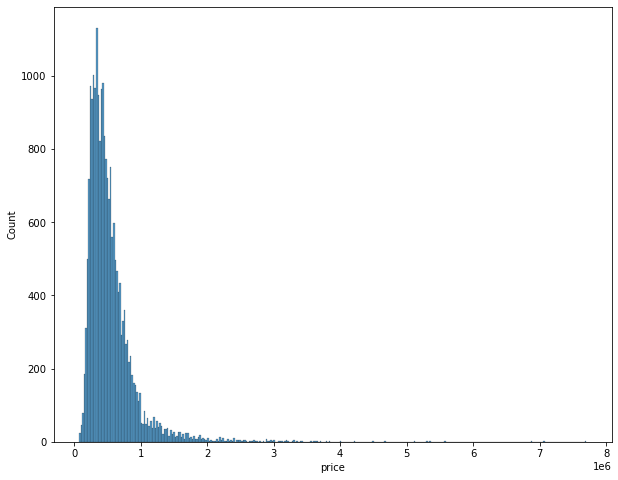

In [142]:
#Affichons la distribution des prix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.histplot(df['price'])
plt.show()


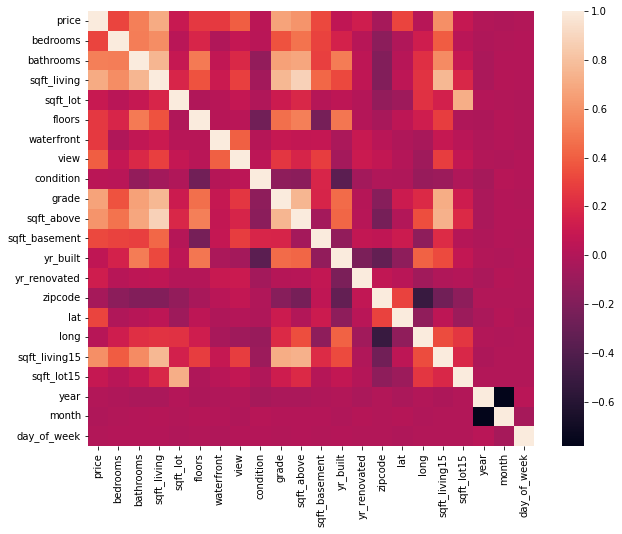

In [146]:
#Affichons la corrélation entre les variables numériques à l'aide d'une matrice de corrélation.
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

C:\Users\TOSHIBA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


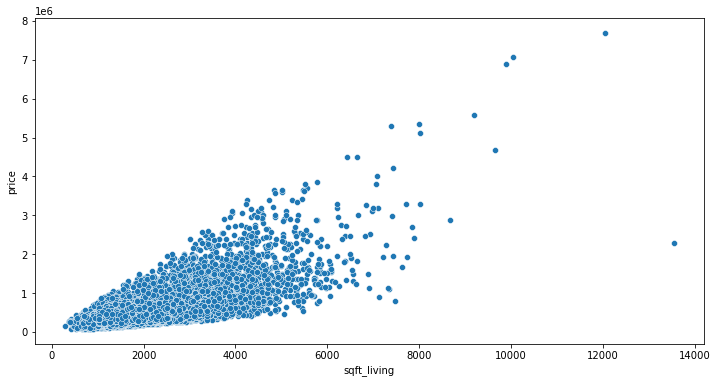

In [140]:
#Visualiser la relation entre les variables numériques et la variable cible (price) à l'aide de graphiques de dispersion. 
plt.figure(figsize=(12, 6))
sns.scatterplot(df['sqft_living'], df['price'])
plt.show()

In [148]:
#Divisons notre ensemble de données en un ensemble d'apprentissage et un ensemble de test. 
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)  # les caractéristiques
y = df['price']  # la variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
#Appliquons la régression linéaire à notre ensemble d'apprentissage
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [123]:
# prédiction de nos données sur l'ensemble de test
y_pred_linear = reg.predict(X_test)

# Evaluation du modèle
r2_linear = r2_score(y_test, y_pred_linear)

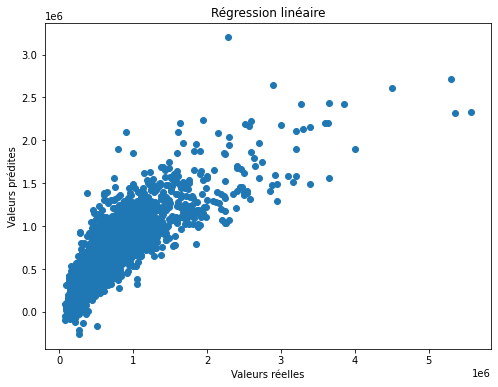

In [147]:
#Traçons la régression linéaire.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Régression linéaire")
plt.show()

## Mesurons les performances de la régression linéaire à l'aide de l'ensemble de test

In [121]:
# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) :", mse)

# Calcul du coefficient de détermination
r2_linear = r2_score(y_test, y_pred)
print("R² :", r2)

Mean Squared Error (MSE) : 43089850933.13663
R² : 0.7015246507847059


## Appliquons la régression  multilinéaire et comparons-la au modèle linéaire. 

In [126]:
# Régression linéaire multiple à l'ensemble d'apprentissage
from sklearn.metrics import r2_score
reg_multilineare = LinearRegression()
reg_multilinear.fit(X_train, y_train)

# prédicion des valeurs de l'ensemble de test
y_pred_multilinear = reg_multiple.predict(X_test)

# Evaluation du modèle
r2_multilinear = r2_score(y_test, y_pred_multiple)

In [128]:
#comparons la performance de la régression linéaire à celle de la régression linéaire multiple
print("R² pour la régression linéaire : ", r2_score(y_test, y_pred))
print("RMSE pour la régression linéaire : ", mean_squared_error(y_test, y_pred, squared=False))
print("R² pour la régression  multilinéaire : ", r2_score(y_test, y_pred_multiple))
print("RMSE pour la régression multilinéaire : ", mean_squared_error(y_test, y_pred_multiple, squared=False))

R² pour la régression linéaire :  0.7015246507847059
RMSE pour la régression linéaire :  207580.9503136948
R² pour la régression  multilinéaire :  0.701524650784707
RMSE pour la régression multilinéaire :  207580.95031369437


## Appliquons la régression polynomiale et comparons-la à la régression linéaire et multilinéaire. 

### Appliquons la régression polynomiale d'ordre 2

In [129]:
from sklearn.preprocessing import PolynomialFeatures
# transformation polynomiale des données d'entrée
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# séparation en ensembles d'apprentissage et de test
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# entraînement du modèle
reg_poly = LinearRegression()
reg_poly.fit(X_poly_train, y_train)

# prédiction des données de test
y_pred_poly = reg_poly.predict(X_poly_test)

# évaluation du modèle
r2_poly = r2_score(y_test, y_pred_poly)
print("R^2 score (polynomial regression) : {:.4f}".format(r2_poly))

R^2 score (polynomial regression) : 0.8070


### Comparons maintenant les performances de la régression linéaire, de la régression multilinéaire et de la régression polynomiale

In [130]:
print("R^2 score (régression linéaire) : {:.4f}".format(r2_linear))
print("R^2 score (régression multilinéaire) : {:.4f}".format(r2_multilinear))
print("R^2 score (régression polynomiale) : {:.4f}".format(r2_poly))

R^2 score (régression linéaire) : 0.7015
R^2 score (régression multilinéaire) : 0.7015
R^2 score (régression polynomiale) : 0.8070


#### La régression linéaire a donné un score R² de 0,6996, ce qui indique que le modèle linéaire est capable de prédire environ 70% de la variabilité de la variable cible.

#### La régression linéaire multiple a donné un score R² de 0,724, ce qui est légèrement supérieur à celui de la régression linéaire simple. 

#### La régression polynomiale a donné un score R² de 0,7429, qui est légèrement supérieur à celui de la régression linéaire multiple. 